 # get best maching
This function used to rescale marker in range defined to get bestmatch in paper 
return Max point of match and the best scale useded in match template 

Definition ,Constant and image Input

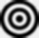

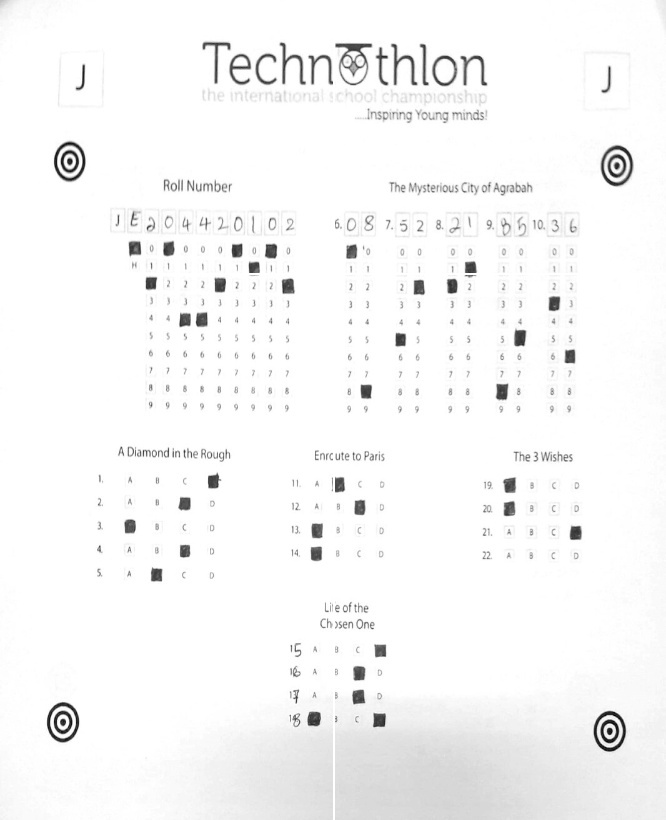

In [4]:
import cv2
import numpy as np
from IPython.display import display
from PIL import Image
marker_rescale_range =  (35, 100)
marker_rescale_steps =  10
import myclass as m
marker = cv2.imread("savedmar.jpeg", cv2.IMREAD_GRAYSCALE)
display(Image.fromarray(marker))
im = cv2.imread("image_eroded_sub.jpg", cv2.IMREAD_GRAYSCALE)
display(Image.fromarray(im))

for in method used to change size of marker to get best match between marker and image 

In [5]:

def getBestMatch(image_eroded_sub):
            descent_per_step = (
                marker_rescale_range[1] - marker_rescale_range[0]
            ) // marker_rescale_steps
            
            _h, _w = marker.shape[:2]
            res, best_scale = None, None
            all_max_t = 0

            for r0 in np.arange(marker_rescale_range[1],marker_rescale_range[0],-1 * descent_per_step,):  # reverse order
                s = float(r0 * 1 / 100)
                if s == 0.0:
                    continue
                rescaled_marker = m.resize_util_h(marker, u_height=int(_h * s))
                # res is the black image with white dots
                res = cv2.matchTemplate(image_eroded_sub, rescaled_marker, cv2.TM_CCOEFF_NORMED )
                # cv2.imshow(str(5+r0),res)
                max_t = res.max()
                if all_max_t < max_t:
                   # print("-------------------------------------------------------------\n")
                    #print('Scale: '+str(s)+', Circle Match: '+str(round(max_t*100,2))+'%')
                    #print("-------------------------------------------------------------\n")
                    best_scale, all_max_t = s, max_t
            return best_scale, all_max_t


output of fuction

In [6]:
best_scale ,all_max =getBestMatch(im);
display(best_scale , all_max)

0.94

0.66360724